# **PDES and Randomness Summer School** Overview
The PDES and Randomness Summer School is an initiative hosted at AIMS Senegal, aiming to explore cutting-edge topics in partial differential equations and randomness, bringing together young researchers and experienced scientists in an immersive learning environment.

This summer school is supported by the African Institute for Mathematical Sciences (AIMS Senegal) and benefits from the collaboration and support of multiple academic and scientific partners.

<img src="https://www.financialafrik.com/wp-content/uploads/2018/05/AIMSlogocrop-600x298.jpg" width="800">

# Logistic Regression (90 min)

Over the past 140 years, we’ve literally gone from making some temperature measurements by hand to using sophisticated satellite technology. Today’s temperature data come from many sources, including thousands of land weather stations, weather balloons, radar, ships and buoys, satellites, and volunteer weather watchers.

It is important to make use of this increasingly accurate data to predict the future weather.

In this session we will explore the rain in Australia dataset. This dataset contains daily weather observations from numerous Australian weather stations.

## 1. Importing Libraries (<5 min)

Before we even start, we need to import the libraries with functions and data types/structures that we are going to use.

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


## 2. Data Preparation (60 min)

It is important to explore and preprocess the data before training an algorithm on any dataset.
This contributes to efficiency and the performance of the model.

### 2.1. Importing Data (5 min)

First we need to load the dataset that we will work with


#### Question 1.1: Charger l'Ensemble de Données et Afficher les Informations de Base

Chargez l'ensemble de données `HistoricalDailyWeatherRecords.csv` dans un DataFrame pandas. Affichez les 5 premières lignes, puis imprimez les informations générales du DataFrame (comme les types de colonnes et les comptes non nuls).

In [ ]:
### Votre code ici

##### response

In [ ]:

# Load the dataset
df = pd.read_csv('HistoricalDailyWeatherRecords.csv')

# Afficher les premières lignes du DataFrame
print("Les 5 premières lignes du DataFrame:")
print(df.head())

# Afficher les informations générales sur le DataFrame
print("\nInformations sur le DataFrame:")
print(df.info())


## 2.2. Exploring Data (30 mins)

#### Question 2.1: Identifier et Quantifier les Données Manquantes
Remplacez les chaînes de caractères 'na' par de véritables valeurs NaN. Ensuite, calculez et affichez le nombre total et le pourcentage de valeurs manquantes pour chaque colonne du jeu de données.

In [ ]:
# Votre code ici

##### reponse

In [ ]:
# Replace 'na' string with actual NaN values for proper missing data detection
df.replace('na', np.nan, inplace=True)

# Calculate the number of missing values for each column
missing_values_count = df.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a new DataFrame to neatly display the summary of missing data
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})

# Print the summary of missing data
print("Summary of Missing Data:")
print(missing_data_summary)

Summary of Missing Data:
                          Missing Count  Missing Percentage
date                                  0            0.000000
station                               0            0.000000
daily_rainfall_total                105            3.672613
highest_30_min_rainfall            1755           61.385100
highest_60_min_rainfall            1755           61.385100
highest_120_min_rainfall           1755           61.385100
mean_temperature                    139            4.861840
maximum_temperature                 115            4.022385
minimum_temperature                 115            4.022385
mean_wind_speed                      96            3.357817
max_wind_speed                       97            3.392795


#### Question 3.1: Convertir les Types de Données et Créer la Variable Cible
Convertissez les colonnes pertinentes en types numériques (en gérant les erreurs par conversion en NaN). Convertissez la colonne 'date' en objets datetime et triez le DataFrame. Ensuite, créez une nouvelle variable cible binaire nommée raintomorrow, qui est 1 si daily_rainfall_total du jour suivant est supérieur à 0, et 0 sinon. Enfin, supprimez toutes les lignes contenant des valeurs NaN après cette transformation.

In [ ]:
# Votre Code ici

##### La Reponse

In [ ]:
# Convertir les colonnes pertinentes en types numériques, en forçant les erreurs à NaN
numeric_cols = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall',
                'highest_120_min_rainfall', 'mean_temperature', 'maximum_temperature',
                'minimum_temperature', 'mean_wind_speed', 'max_wind_speed']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir 'date' en datetime et trier par date et station
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['date', 'station'], inplace=True)

# Créer la variable cible 'raintomorrow': 1 s'il pleut demain, 0 sinon
# Décaler 'daily_rainfall_total' de 1 pour obtenir la pluie de demain, regroupé par station
df['raintomorrow'] = df.groupby('station')['daily_rainfall_total'].shift(-1).apply(lambda x: 1 if x > 0 else 0)

# Supprimer les lignes avec des valeurs NaN après la création de 'raintomorrow'
df.dropna(inplace=True)

print("DataFrame après prétraitement et création de 'raintomorrow':")
print(df.head())
#print("\nForme après la suppression des NaN:", df.shape)

#### Histogram

##### Question 4.1: Visualiser les Distributions des Données avec des Histogrammes
Générez et affichez des histogrammes pour toutes les caractéristiques numériques, y compris la variable raintomorrow nouvellement créée. Disposez ces histogrammes en grille pour une meilleure visualisation.

In [ ]:
# Votre Code ici

###### Reponse

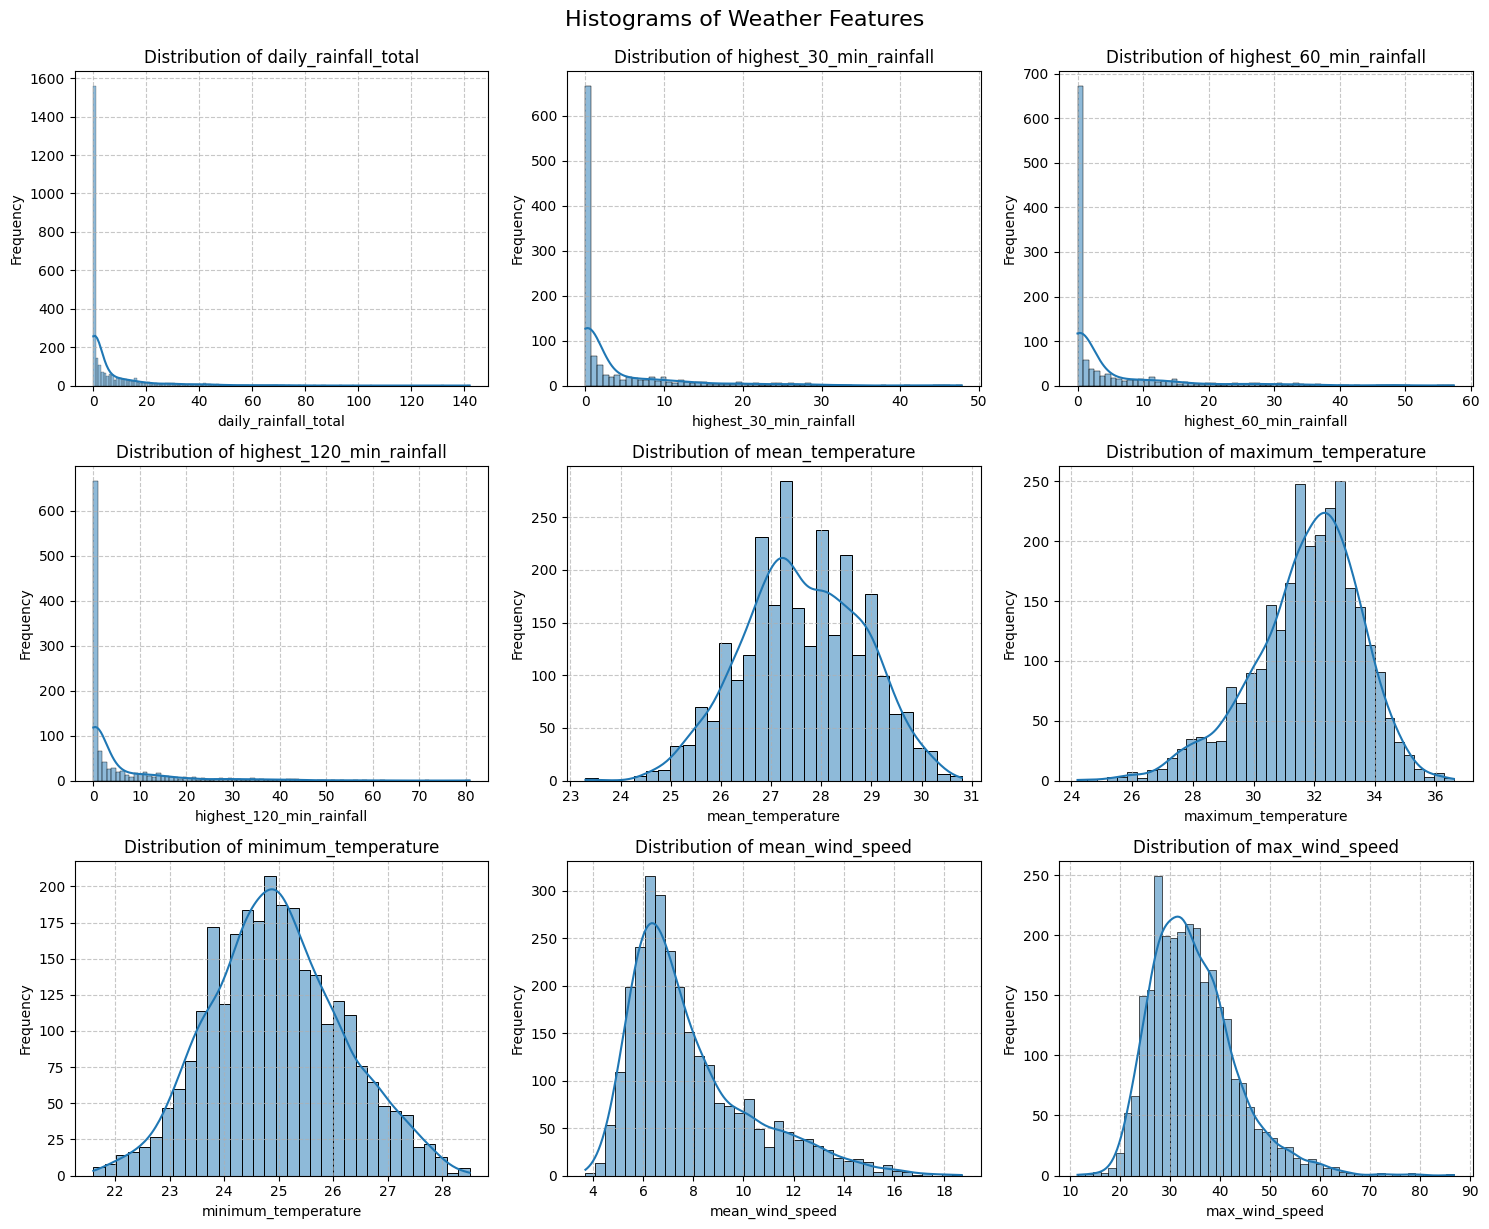

In [ ]:
# Define columns that should be treated as numerical for histogram plotting
numeric_cols = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall',
                'highest_120_min_rainfall', 'mean_temperature', 'maximum_temperature',
                'minimum_temperature', 'mean_wind_speed', 'max_wind_speed']

# Determine the number of subplots needed
num_plots = len(numeric_cols)
num_cols = 3 # You can adjust this for desired number of columns in the grid
num_rows = math.ceil(num_plots / num_cols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4)) # Adjust overall figure size
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Histograms of Weather Features', y=1.02, fontsize=16) # Overall title
plt.show()

In [ ]:
# Convert relevant columns to numeric types, coercing errors to NaN
for col in ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall',
            'highest_120_min_rainfall', 'mean_temperature', 'maximum_temperature',
            'minimum_temperature', 'mean_wind_speed', 'max_wind_speed']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# Convert 'date' to datetime and sort by date and station
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['date', 'station'], inplace=True)

# Create 'raintomorrow' target variable: 1 if it rains tomorrow, 0 otherwise
# Shift 'daily_rainfall_total' by 1 to get tomorrow's rainfall, grouped by station
df['raintomorrow'] = df.groupby('station')['daily_rainfall_total'].shift(-1).apply(lambda x: 1 if x > 0 else 0)



#### Correlation (5 min)

Correlation means - to which degree do 2 variables change together?
Examples - temperature outside and how much water evaporates per given time are very connected.
           amount of sun amd mood are connected
           temperature in one country and dates of exams in another, however, are not connected.

###### Question 5.1: Calculer et Visualiser la Matrice de Corrélation
Calculez la matrice de corrélation pour toutes les caractéristiques numériques, y compris raintomorrow. Imprimez la matrice puis visualisez-la à l'aide d'une carte de chaleur (heatmap).

In [ ]:
# Votre Code Ici

###### Reponse

Correlation Matrix (including 'raintomorrow'):
                          daily_rainfall_total  highest_30_min_rainfall  \
daily_rainfall_total                  1.000000                 0.936082   
highest_30_min_rainfall               0.936082                 1.000000   
highest_60_min_rainfall               0.958558                 0.985313   
highest_120_min_rainfall              0.975681                 0.961975   
mean_temperature                     -0.298407                -0.245272   
maximum_temperature                  -0.105060                -0.024339   
minimum_temperature                  -0.444465                -0.438237   
mean_wind_speed                      -0.231094                -0.248318   
max_wind_speed                        0.238094                 0.272624   
raintomorrow                          0.148882                 0.156436   

                          highest_60_min_rainfall  highest_120_min_rainfall  \
daily_rainfall_total                     0.95855

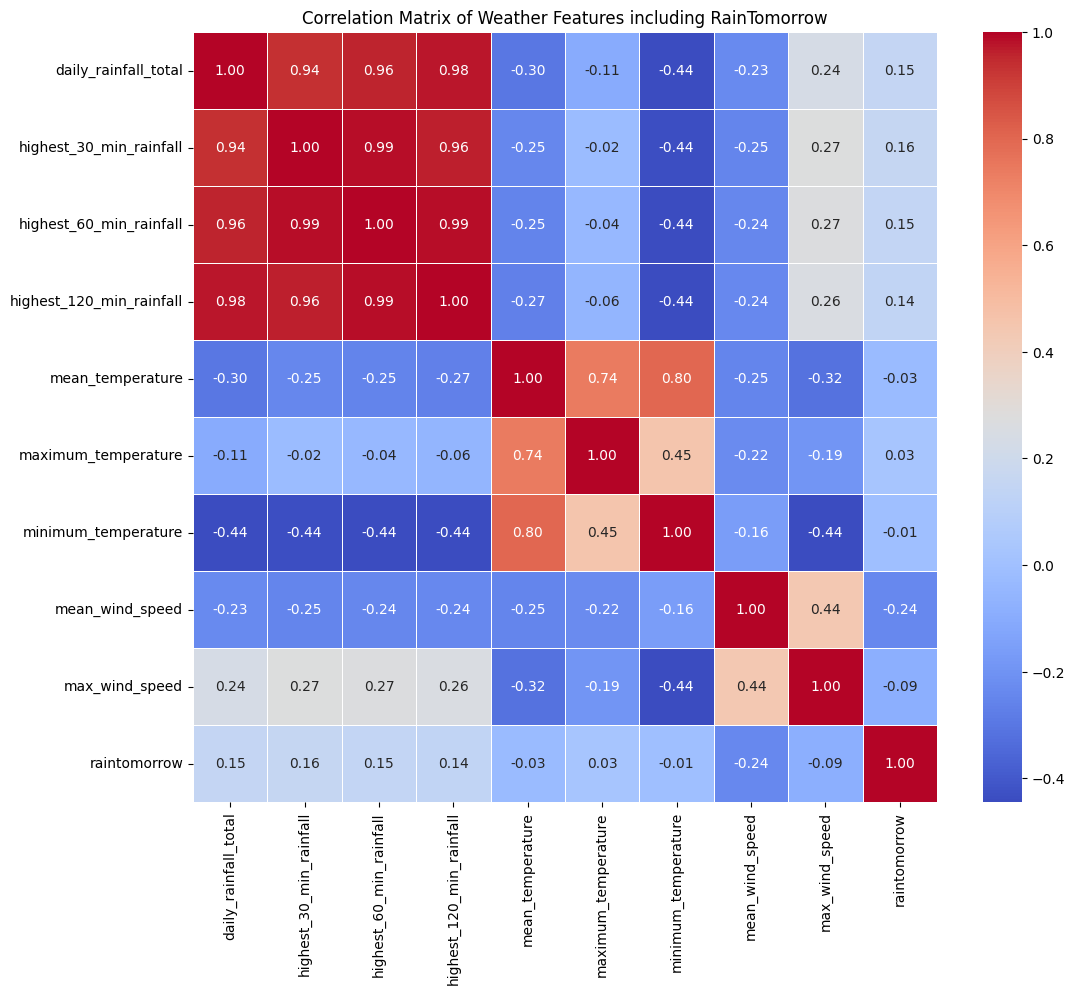

In [ ]:
# Create 'raintomorrow' target variable: 1 if it rains tomorrow, 0 otherwise
# This is done by shifting 'daily_rainfall_total' by 1 day (tomorrow's rainfall)
# and applying a condition, grouped by 'station' to ensure correct shifting within each station
#df['raintomorrow'] = df.groupby('station')['daily_rainfall_total'].shift(-1).apply(lambda x: 1 if x > 0 else 0)



# Add 'raintomorrow' to the list of columns for correlation calculation
all_corr_cols = numeric_cols + ['raintomorrow']

# Calculate the correlation matrix for all relevant numerical columns, including 'raintomorrow'
correlation_matrix_with_raintomorrow = df[all_corr_cols].corr()

# Print the full correlation matrix
print("Correlation Matrix (including 'raintomorrow'):")
print(correlation_matrix_with_raintomorrow)

# Create and display a heatmap for better visualization of the correlation matrix
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix_with_raintomorrow, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Weather Features including RainTomorrow')
plt.show()

### 2.3. Cleaning Data (5 min)

We see that not all columns are equally useful for predicting the probability of rain.
Let's remove the columns that are not helpful.

#### 2.4 Missing data imputation (10 mins)

<u>Missing data (value) imputation</u> - replacing missing data with an estimated value based on other available information, allowing to keep all data points (especially important in small datasets)

<img src="https://towardsdatascience.com/wp-content/uploads/2021/08/11OjNoQumsn4OfIbAafaDGw.png" width="400" height="200">

image source: https://towardsdatascience.com/how-to-handle-missing-data-b557c9e82fa0

Every subject in a randomly chosen sample can be replaced by a new subject that is randomly chosen from the same source population as the original subject, without compromising the conclusions. Imputation techniques are also based on this basic principle of replacement. *["Review: A gentle introduction to imputation of missing values", A. Rogier et al., 2006, Journal of Clinical Epidemiology 59 (2006) 1087e1091]*

The right type of missing value imputation to choose depends on the type of missing data.

<u>Types of missing data</u>:
1. **Missing completely at random**
- accidental breaking, deletion of data, corruption, contamination etc.
- can be correctly imputed by simplest methods
2. **Missing not at random**
- reason for missingness ... is related to *unobserved* ... characteristics
- almost impossible to correctly impute
3. **Missing at random**
- reason for missingness is based on other *observed* ... characteristics
- missing data can ... be considered random conditional on these other patient characteristics that determined their missingness and that are available at the time of analysis
- all simple techniques for handling missing data, i.e., complete and available case analyses, the indicator method and overall mean imputation, give biased results.

The simple algorithms often either cannot run on datasets with missing data, or ignore the samples with missing data, so we will apply missing value imputation.

Here we will use **Drop missing value**

In [ ]:
# Drop any rows that now have NaN values (e.g., last day for each station due to shift, or original 'na' values)
df.dropna(inplace=True)

## Construction du Modèle de Régression Logistique

### Question 6.1: Entraîner le Modèle de Régression Logistique
Définissez les caractéristiques (X) et la cible (y). Divisez les données en ensembles d'entraînement et de test (80% entraînement, 20% test). Standardisez les caractéristiques à l'aide de StandardScaler. Entraînez un modèle de régression logistique sur les données d'entraînement standardisées.

In [ ]:
# Votre code ici

#### Reponse

In [ ]:
# Drop rows with NaN values after creating 'raintomorrow'
#df.dropna(inplace=True)

# Define features (X) and target (y)
features = ['daily_rainfall_total', 'highest_30_min_rainfall', 'highest_60_min_rainfall',
            'highest_120_min_rainfall', 'mean_temperature', 'maximum_temperature',
            'minimum_temperature', 'mean_wind_speed', 'max_wind_speed']
X = df[features]
y = df['raintomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### <u>Data normalization</u> - transforming the range of features to a common (usually standard) scale (often 0-1).



**Motivation**:
1. Normalized data enhances model performance and improves the accuracy of a model.
- all features contribute equally
- the trends and variations are more visible and easily identifiable
2. Makes the training more stable.

<img src="https://static-assets.codecademy.com/Paths/data-science-career-path/MachineLearning/normalized.png" width="400" height="200">

image source: https://www.codecademy.com/article/normalization

**Types of normalization:** <br>
1)<u>Min-Max Scaling</u> <br>

Min-max scaling is very often simply called ‘normalization.’ It transforms features to a specified range, typically between 0 and 1. The formula for min-max scaling is:<br>

**X_normalized** = (x - min(x)) / (max(x) - min(x)) <br>

That most often used technique works when:
- The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers
- The data distribution is unknown or non-Gaussian, and the data is approximately uniformly distributed across the range

2) <u>Z-score normalization (standardization)</u><br>

Z-score normalization assumes a Gaussian (bell curve) distribution of the data and transforms features to have a mean (μ) of 0 and a standard deviation (σ) of 1. The formula for standardization is:

**X_standardized** = x−μ / σ

- This technique is particularly useful when dealing with algorithms that assume normally distributed data, such as many linear models.

3)<u>Decimal scaling normalization</u>

The objective of decimal scaling normalization is to scale the feature values by a power of 10, ensuring that the largest absolute value in each feature becomes less than 1. It is useful when the range of values in a dataset is known, but the range varies across features. The formula for decimal scaling normalization is:

**X_decimal** = X / 10d

Where X is the original feature value, and d is the smallest integer such that the largest absolute value in the feature becomes less than 1.

- Decimal scaling normalization is advantageous when dealing with datasets where the absolute magnitude of values matters more than their specific scale.

4)<u>Log scaling normalization</u>

Log scaling normalization converts data into a logarithmic scale, by taking the log of each data point. It is particularly useful when dealing with data that spans several orders of magnitude. The formula for log scaling normalization is:

**X_log** = log(X)

- This normalization comes in handy with data that follows an exponential growth or decay pattern. It compresses the scale of the dataset, making it easier for models to capture patterns and relationships in the data. Population size over the years is a good example of a dataset where some features exhibit exponential growth.
- Log scaling normalization can make these features more amenable to modeling.

5)<u>Robust scaling normalization</u>

Robust scaling normalization is useful when working with datasets that have outliers. It uses the median and interquartile range (IQR) instead of the mean and standard deviation to handle outliers. The formula for robust scaling is:

**Xrobust** = X – median/ IQR #ToDo: formula

- Since robust scaling is resilient to the influence of outliers, this makes it suitable for datasets with skewed or anomalous values.

We saw (from the histograms) that the range of values in features is very different, so let's perform normalization to deal with this challenge.
**We will use the Standard scaling here**, but feel free to try different and more complex techniques.

In [ ]:
# Votre code ici

#### Reponse

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)





LogisticRegression(random_state=42)

## Évaluation du Modèle

### Question 7.1: Évaluer les Performances du Modèle
Effectuez des prédictions sur l'ensemble de test à l'aide du modèle de régression logistique entraîné. Calculez et imprimez le score de précision (accuracy) et la corrélation entre les valeurs prédites et les valeurs réelles de raintomorrow.



In [ ]:
# Votre code ici

#### Reponse

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)



In [ ]:
# Calculate the correlation between predicted values and actual values from the test set
correlation = np.corrcoef(y_pred, y_test)[0, 1]




In [ ]:
# Print the correlation
print(f"Correlation between predicted and actual 'raintomorrow' values: {correlation:.4f}")


Correlation between predicted and actual 'raintomorrow' values: 0.1875


In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.5935


### Question 7.2: Générer et Visualiser la Matrice de Confusion
Générez la matrice de confusion pour les prédictions du modèle sur l'ensemble de test. Affichez la matrice de confusion à l'aide d'une carte de chaleur (heatmap).

In [ ]:
# Votre code Ici

#### Reponse

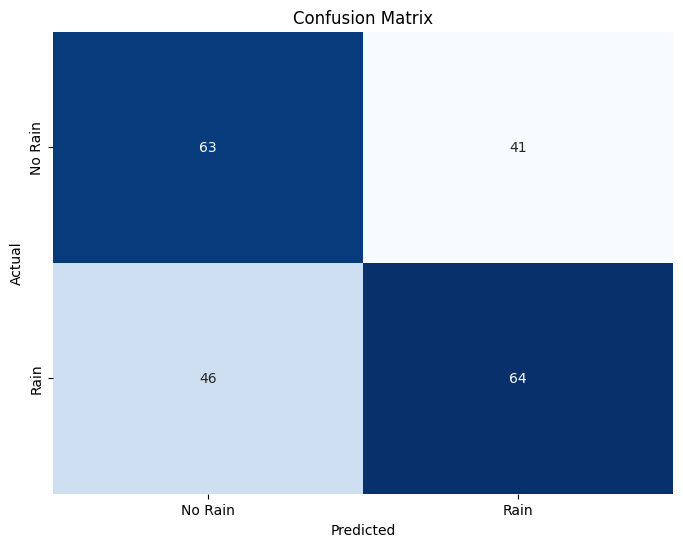

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined from your previous model training
# y_test: actual values from the test set
# y_pred: predicted values from the model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()